# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.shape

(7752, 25)

- There are 7752 Total number of rows and 25 different columns present in the datasets 

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

- All the data is in the float data type only date is in object data type 

In [5]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- There are only 75 cells out of 7752 cell which is having NaN value so we drop those cells 0.96% cells and which will not affect much on the prediction of the moel 

In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
df=df.dropna()
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [9]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

- As station number and Date has unique values and which does not create any contribution to the final prediction so we are dropping those cells 

In [10]:
df= df.drop('station', axis= 1)
df=df.drop('Date', axis=1)
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


# Univariant Analysis

<AxesSubplot:xlabel='Present_Tmax'>

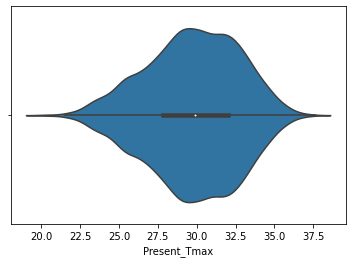

In [11]:
sns.violinplot(df['Present_Tmax'])

- Almost all the values are ranging between 22.5 to 37.5 degree celcius 
- similarly all the columns gives the same patterns as observed in following figure 

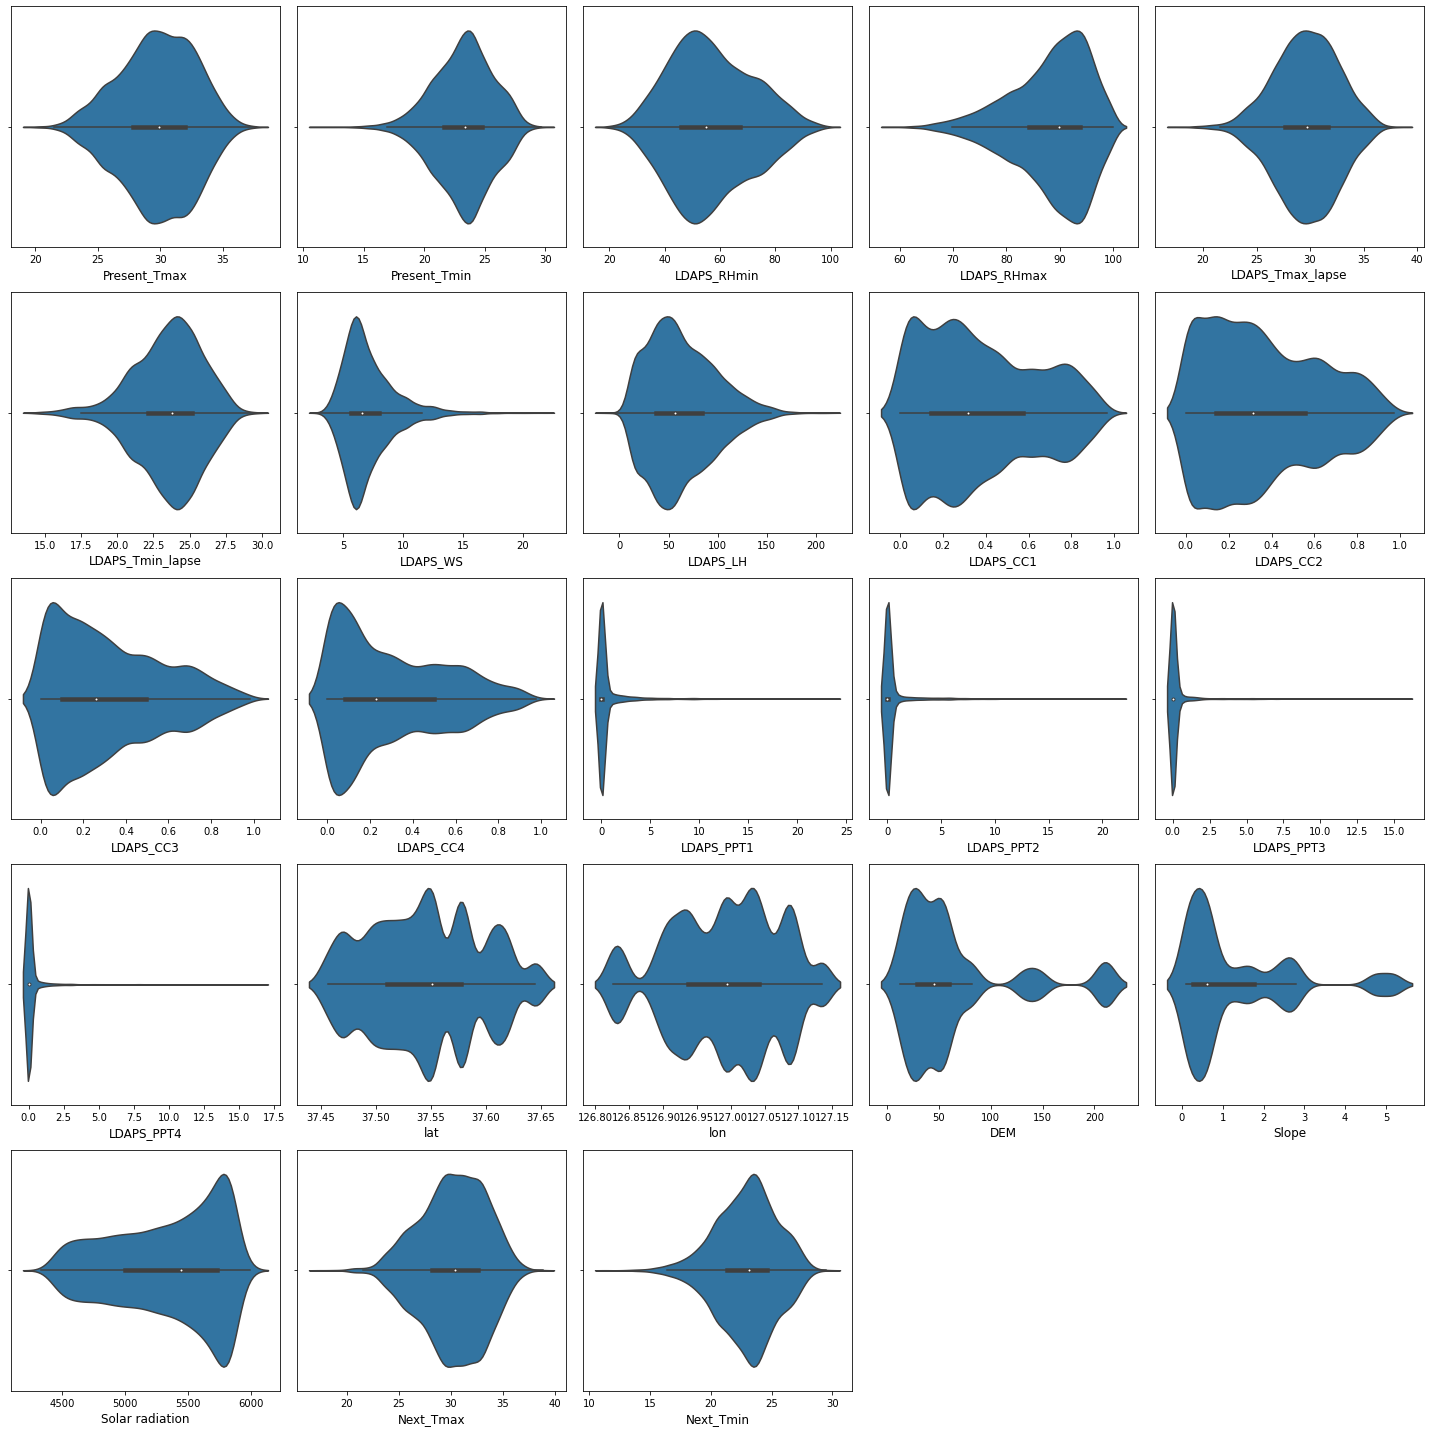

In [12]:
plt.figure(figsize=(20,20))
plot= 1
for i in df.columns:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.violinplot(df[i])
        plt.xlabel(i, size=12)
    plot+=1
plt.tight_layout()

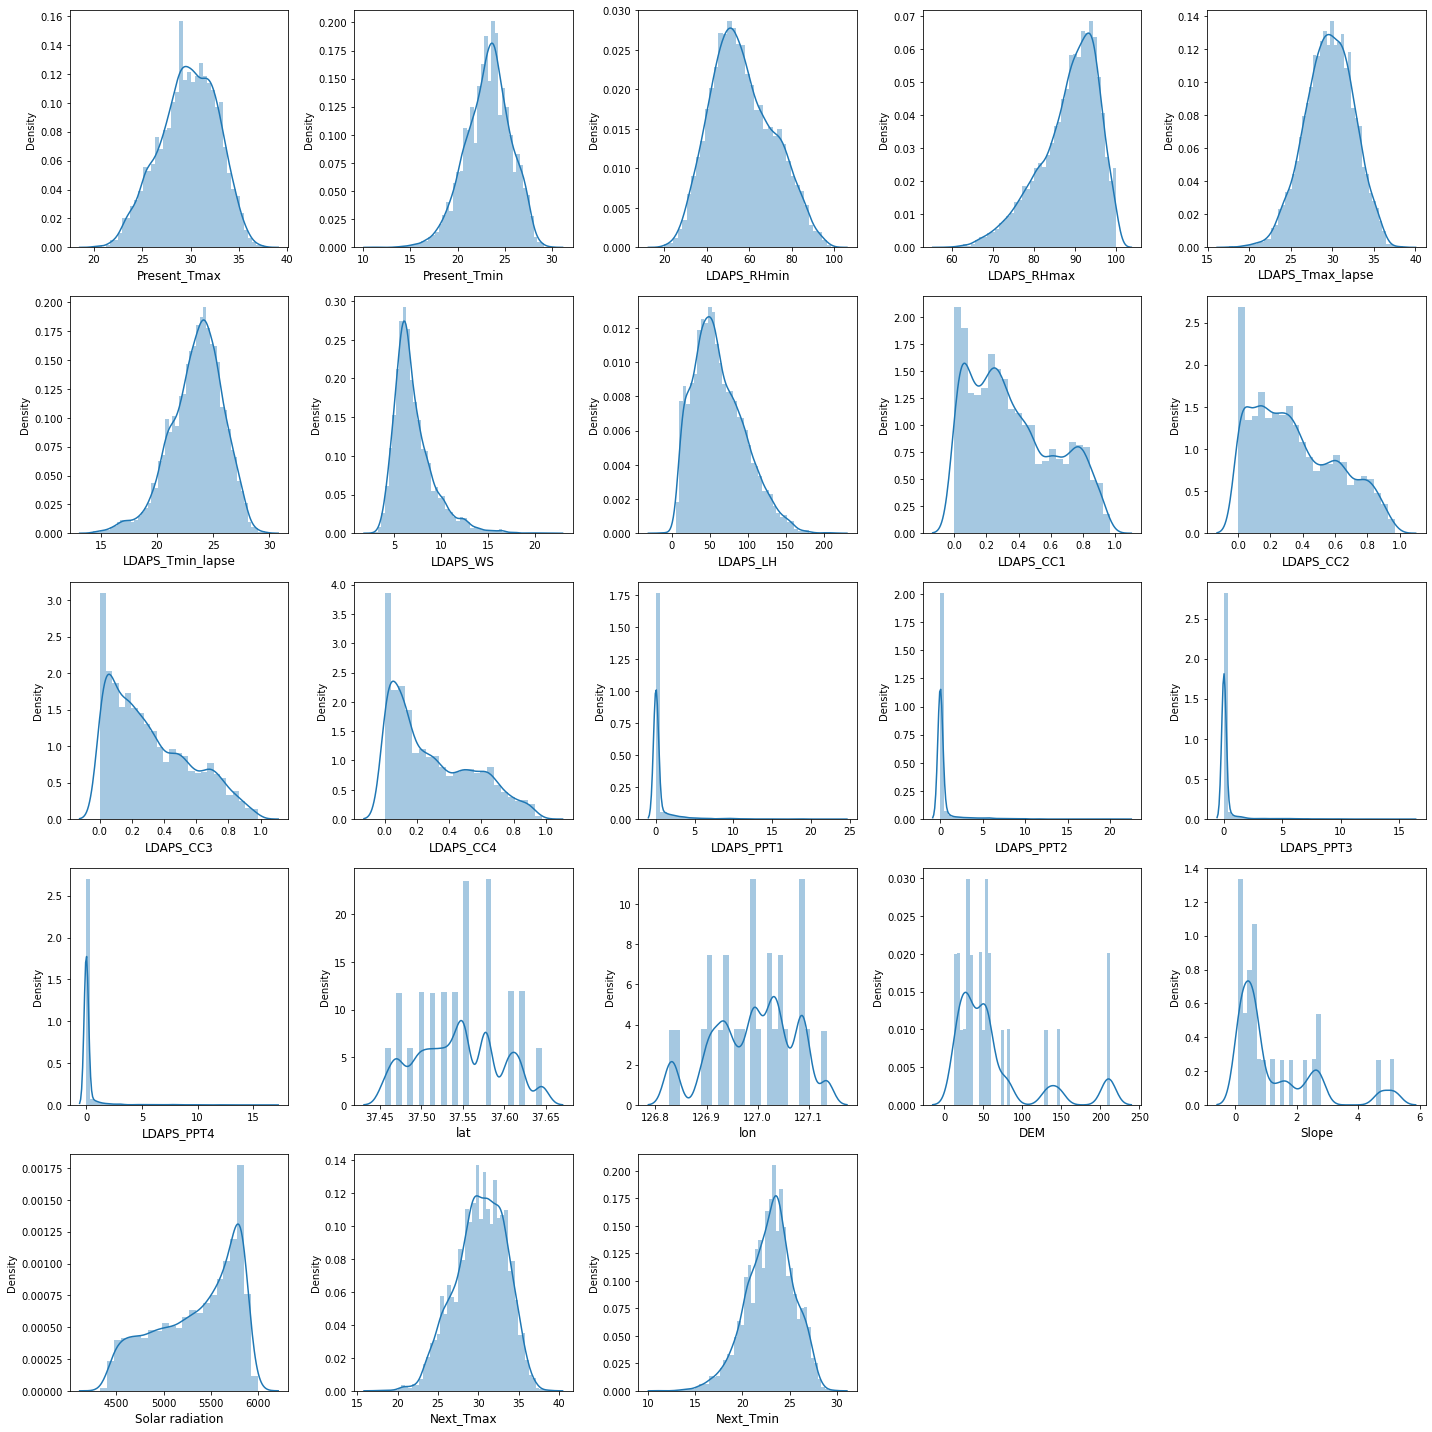

In [13]:
plt.figure(figsize=(20,20))
plot= 1
for i in df.columns:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.distplot(df[i])
        plt.xlabel(i, size=12)
    plot+=1
plt.tight_layout()

- Almost all the data are properly disctributed 

# Statistics

In [14]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0.353318,0.748029,0.104660,0.382768,0.525269,0.215525,0.126423,0.206603,0.513123,0.587938,...,0.275777,0.239969,0.224971,1.186076,0.005302,2.769091,1.111162,1.510565,0.366861,0.689265
1,0.725138,0.664721,0.305052,0.311697,0.078334,0.223368,0.644133,0.313359,0.545304,0.402304,...,0.275777,0.239969,0.224971,1.186076,0.512280,0.315828,0.543220,1.222997,0.083068,0.165513
2,0.624033,0.043400,0.549344,0.609425,0.160080,0.449896,0.439100,1.244497,0.606944,0.380211,...,0.275777,0.239969,0.224971,0.650626,0.840503,0.526719,0.723891,1.209602,0.275895,0.398527
3,0.758840,0.085054,0.103573,1.128335,0.028710,0.079238,0.663353,0.096026,0.580143,0.502221,...,0.275777,0.239969,0.224971,1.987268,0.386040,0.298272,0.928888,1.194265,0.468721,0.559681
4,0.556630,0.539758,0.037665,0.249244,0.171981,0.010803,0.624327,1.349989,0.827872,0.409191,...,0.275777,0.239969,0.224971,0.117159,1.812547,0.494848,0.549485,1.200286,0.308032,0.165513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,2.240616,2.247578,2.190405,1.402898,0.614083,2.223667,0.225479,1.569844,1.203497,1.261546,...,0.275777,0.239969,0.224971,0.117159,0.613271,0.655747,0.500966,2.065599,0.848928,2.099366
7746,2.442826,2.414195,1.820788,0.648815,0.990460,2.432415,0.609132,0.583486,1.151793,1.283455,...,0.275777,0.239969,0.224971,0.686016,1.193973,0.735482,0.820711,2.098689,0.720377,2.341098
7747,2.173212,2.539157,2.050081,1.318376,1.110333,2.021883,0.434188,0.283984,1.290699,1.064318,...,0.275777,0.239969,0.224971,0.150566,1.267697,0.852919,0.804538,2.095175,0.623964,1.938212
7748,2.173212,2.289232,2.234735,1.537141,0.886737,2.039881,0.253241,0.452772,1.268430,1.087864,...,0.275777,0.239969,0.224971,0.418291,1.040466,0.821476,0.755800,2.106671,0.527550,1.656192


In [15]:
df_n=df[(z<3).all(axis=1)]
df_n

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


- Zscore method is used to remove the outliears in the datasets
- In the original datasets there are 7588 rows available while after outliears total 6739 rows are present, it clearly shows that outliears are removed from the datasets and we can this datasets for further model building tasks

In [16]:
df_cor=df_n.corr()
df_cor

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.610428,-0.154266,-0.297804,0.540680,0.616886,-0.105162,0.130771,-0.290078,-0.157917,...,-0.040151,-0.015137,-0.042837,-0.052041,0.011132,-0.168792,-0.091336,-0.059891,0.586943,0.615950
Present_Tmin,0.610428,1.000000,0.151385,-0.039688,0.441577,0.764258,0.018711,-0.004055,0.090828,0.117894,...,0.084705,0.036206,-0.055364,-0.072707,-0.043201,-0.241396,-0.138107,0.020030,0.438813,0.785946
LDAPS_RHmin,-0.154266,0.151385,1.000000,0.552581,-0.555583,0.129481,0.236324,-0.035217,0.574389,0.713238,...,0.376428,0.257765,0.185176,0.090054,-0.093969,0.094391,0.119216,0.251733,-0.433872,0.134518
LDAPS_RHmax,-0.297804,-0.039688,0.552581,1.000000,-0.385695,-0.142575,0.094523,0.274590,0.409436,0.360372,...,0.225832,0.120010,0.106028,0.200216,0.018945,0.172348,0.218465,0.153673,-0.301797,-0.097490
LDAPS_Tmax_lapse,0.540680,0.441577,-0.555583,-0.385695,1.000000,0.621299,-0.229614,0.036340,-0.416255,-0.492392,...,-0.237892,-0.141172,-0.160177,-0.038285,0.106354,-0.162061,-0.148246,0.012974,0.816861,0.553227
LDAPS_Tmin_lapse,0.616886,0.764258,0.129481,-0.142575,0.621299,1.000000,-0.052648,-0.135842,0.037375,0.102180,...,0.012282,0.012854,-0.081221,-0.090587,-0.024177,-0.177845,-0.172382,0.106033,0.546479,0.875382
LDAPS_WS,-0.105162,0.018711,0.236324,0.094523,-0.229614,-0.052648,1.000000,-0.045067,0.257654,0.220722,...,0.115051,0.121172,0.196309,-0.014440,-0.077116,0.150448,0.118546,0.136180,-0.277823,-0.013668
LDAPS_LH,0.130771,-0.004055,-0.035217,0.274590,0.036340,-0.135842,-0.045067,1.000000,-0.144578,-0.257382,...,-0.066290,0.010732,0.038641,0.124764,0.021578,0.068085,0.100776,-0.031060,0.176077,-0.046540
LDAPS_CC1,-0.290078,0.090828,0.574389,0.409436,-0.416255,0.037375,0.257654,-0.144578,1.000000,0.759430,...,0.394805,0.191398,0.196073,-0.006352,-0.013794,-0.030685,-0.036418,0.244497,-0.453763,0.008400
LDAPS_CC2,-0.157917,0.117894,0.713238,0.360372,-0.492392,0.102180,0.220722,-0.257382,0.759430,1.000000,...,0.479776,0.248135,0.188292,-0.002066,-0.013838,-0.028371,-0.032839,0.187202,-0.484796,0.078871


<AxesSubplot:>

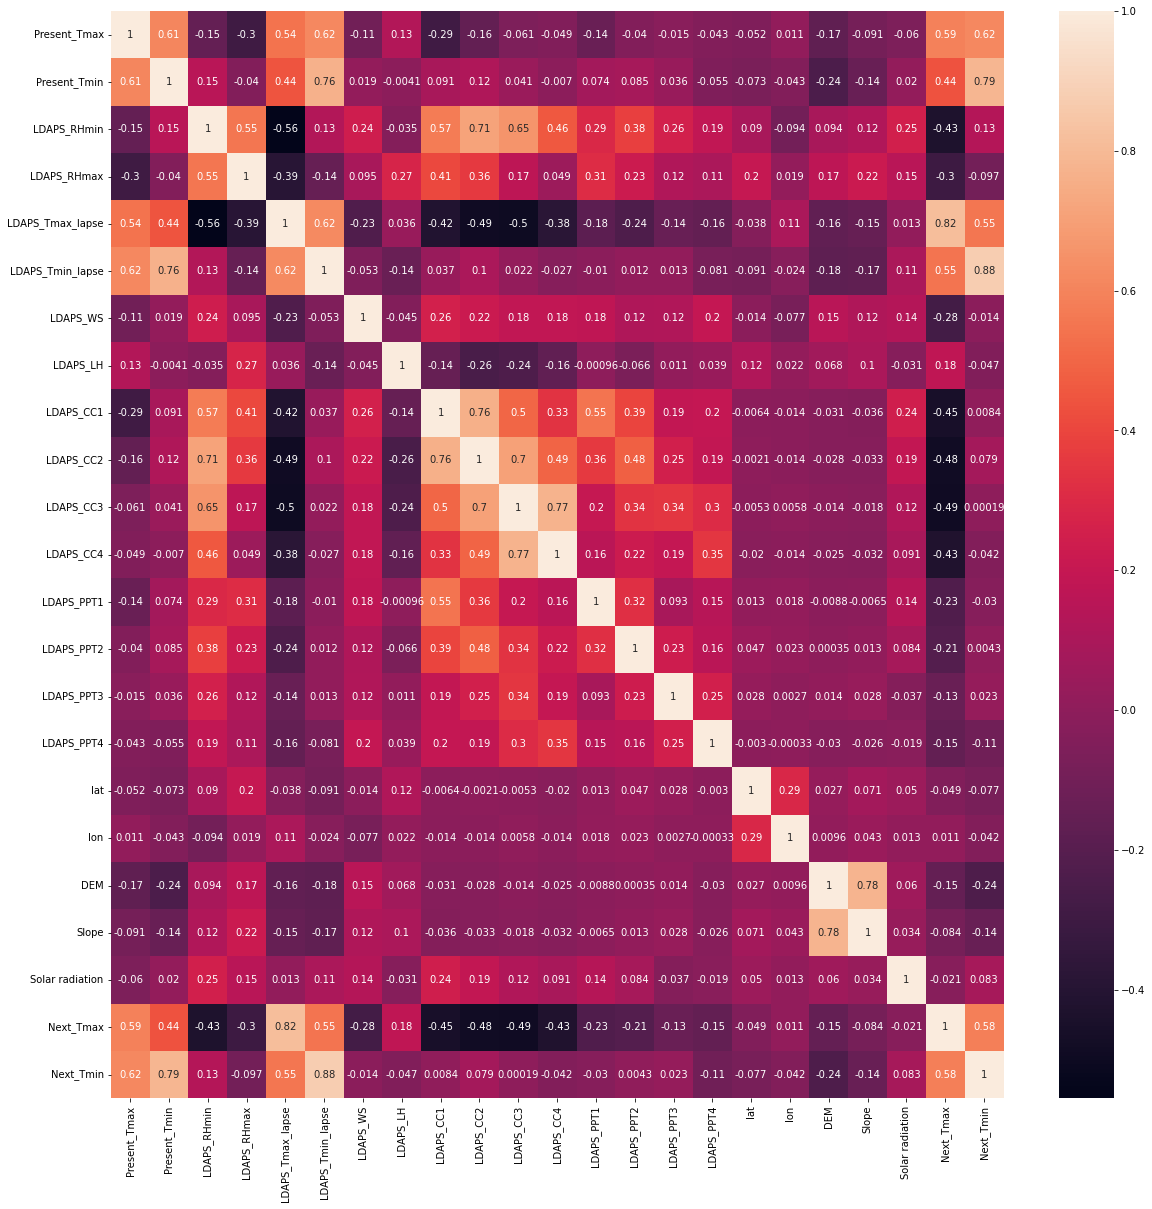

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cor, annot= True)

In [18]:
df_n.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,...,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000
mean,29.920745,23.279359,55.541404,88.062205,29.896609,23.653073,6.857148,61.925497,0.344640,0.330585,...,0.204842,0.101688,0.086418,37.544008,126.990767,61.043211,1.239459,5343.306153,30.532557,23.063793
std,2.867803,2.307663,13.855445,6.980868,2.751168,2.228776,1.845393,33.435691,0.251518,0.240622,...,0.736916,0.392905,0.363733,0.050032,0.079493,53.487853,1.352098,421.004135,2.924092,2.357655
min,21.200000,16.100000,19.794666,66.775764,21.195428,16.558304,2.882580,-8.569043,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4371.684570,21.100000,15.500000
25%,28.000000,21.700000,45.584372,83.780415,28.005382,22.200140,5.614326,36.353189,0.135430,0.132553,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5018.759766,28.600000,21.500000
50%,30.100000,23.400000,54.110855,89.274826,29.935510,23.864125,6.441977,56.689895,0.294937,0.293614,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5432.503418,30.700000,23.200000
75%,32.100000,24.900000,65.092354,93.453079,31.845379,25.212220,7.742607,84.463071,0.503029,0.511801,...,0.004515,0.001614,0.000000,37.577600,127.042000,59.832400,1.767800,5719.569092,32.700000,24.700000
max,37.600000,29.900000,96.169815,99.999008,38.140534,29.619342,13.589191,163.269139,0.967277,0.968353,...,5.690912,3.669601,3.789353,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


# Splitting of Data

## Maximum Temperature Value Prediction 

In [19]:
df_n

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [20]:
df_n

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler= MinMaxScaler()

In [23]:
df_n['Solar radiation']= scaler.fit_transform(df_n[['Solar radiation']])
df_n

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,1.000000,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,0.923771,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,0.920220,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,0.916155,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,0.917751,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,0.052023,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,0.043251,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,0.044183,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,0.041135,28.6,18.8


In [24]:
df_n

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,1.000000,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,0.923771,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,0.920220,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,0.916155,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,0.917751,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,0.052023,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,0.043251,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,0.044183,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,0.041135,28.6,18.8


In [25]:
x1= df_n.drop('Next_Tmin', axis=1)
x1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,1.000000,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,0.923771,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,0.920220,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,0.916155,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,0.917751,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,0.052023,27.6
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,0.043251,28.0
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,0.044183,28.3
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,0.041135,28.6


In [26]:
x2=x1.drop('Next_Tmax', axis=1)
x2

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,1.000000
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,0.923771
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,0.920220
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,0.916155
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,0.917751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,0.052023
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,0.043251
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,0.044183
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,0.041135


In [27]:
y_max=df_n['Next_Tmax']
y_max

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6739, dtype: float64

In [28]:
x2.shape, y_max.shape

((6739, 21), (6739,))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y_transformed = lab.fit_transform(y_max)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x2,y_transformed,test_size=0.2, random_state=20)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5391, 21), (1348, 21), (5391,), (1348,))

In [34]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_lr=lg.predict(x_test)
print("Accuarcy of Logistic Regression = ", mean_absolute_error(y_lr,y_test))
#print("Confusion Matrix of Logistic Regression = \n", confusion_matrix(y_test,y_lr))
#print("Classification Matrix of Logistic Regression = \n", classification_report(y_test,y_lr))

Accuarcy of Logistic Regression =  16.304896142433236


In [35]:
bg= BaggingClassifier()
bg.fit(x_train,y_train)
y_bg=bg.predict(x_test)
print("Error in Bagging Classifier = ", mean_absolute_error(y_test,y_bg))

Error in Bagging Classifier =  11.692136498516321


In [36]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
print('Error in KNN = ', mean_absolute_error(y_test,y_knn))

Error in KNN =  15.150445103857566


In [37]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr=dtr.predict(x_test)
print('Error in Decision Tree Regressor= ', mean_absolute_error(y_test,y_dtr))

Error in Decision Tree Regressor=  10.775964391691394


In [38]:
svc=SVC()
svc.fit(x_train,y_train)
y_svc=svc.predict(x_test)
print('Errors in SVC = ', mean_absolute_error(y_test,y_svc))

Errors in SVC =  22.05341246290801


## Minimum Temperature Value Prediction 

In [39]:
df_n

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,1.000000,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,0.923771,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,0.920220,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,0.916155,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,0.917751,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,0.052023,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,0.043251,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,0.044183,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,0.041135,28.6,18.8


In [40]:
x= df_n.iloc[:,:-2]
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,1.000000
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,0.923771
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,0.920220
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,0.916155
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,0.917751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,0.052023
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,0.043251
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,0.044183
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,0.041135


In [41]:
y= df_n['Next_Tmin']
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6739, dtype: float64

In [42]:
sc= MinMaxScaler()
x= sc.fit_transform(x)
x

array([[0.45731707, 0.38405797, 0.50358031, ..., 1.        , 0.52886982,
        1.        ],
       [0.65243902, 0.39855072, 0.42512167, ..., 0.16199035, 0.08181586,
        0.9237709 ],
       [0.63414634, 0.52173913, 0.37834051, ..., 0.10470232, 0.03299407,
        0.92021995],
       ...,
       [0.12804878, 0.07246377, 0.09095424, ..., 0.01609082, 0.01120145,
        0.04418264],
       [0.12804878, 0.11594203, 0.05559358, ..., 0.02463231, 0.02437152,
        0.04113527],
       [0.12195122, 0.0942029 , 0.04109121, ..., 0.03607831, 0.03401776,
        0.04913649]])

In [43]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y_trans = lab.fit_transform(y)

In [44]:
y_trans.shape

(6739,)

In [45]:
x.shape

(6739, 21)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y_trans,test_size=0.2, random_state=20)

In [47]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_lr=lg.predict(x_test)
print("Error in Logistic Regression = ", mean_absolute_error(y_lr,y_test))

Error in Logistic Regression =  11.22106824925816


In [48]:
bg= BaggingClassifier()
bg.fit(x_train,y_train)
y_bg=bg.predict(x_test)
print("Error in Bagging Classifier = ", mean_absolute_error(y_test,y_bg))

Error in Bagging Classifier =  9.536350148367953


In [49]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
print('Error in KNN = ', mean_absolute_error(y_test,y_knn))

Error in KNN =  6.999554896142433


In [50]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr=dtr.predict(x_test)
print('Error in Decision Tree Regressor= ', mean_absolute_error(y_test,y_dtr))

Error in Decision Tree Regressor=  8.38427299703264


In [51]:
svc=SVC()
svc.fit(x_train,y_train)
y_svc=svc.predict(x_test)
print('Errors in SVC = ', mean_absolute_error(y_test,y_svc))

Errors in SVC =  10.212908011869436


In [52]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x2,y_transformed,test_size=0.30, random_state=1)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu,  "at random_stae", maxRS)

Best accuracy is  0.05440158259149357 at random_stae 23
